# Spam Classification

In [1]:
pwd

'C:\\Users\\Megan Stafford\\Desktop\\Python\\11012018'

In [143]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from collections import Counter
import nltk
nltk.download('stopwords')
import string
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to C:\Users\Megan
[nltk_data]     Stafford\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [154]:
import tensorflow as tf

C:\Users\Megan Stafford\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [178]:
df = pd.read_csv('SMSSpamCollection.csv', 
                 delimiter = '\t+',
                 header = None, 
                 engine = 'python',
                 names = ("label", "message"),
                 encoding = 'latin-1', 
                 dtype = {'category': str, 'text': str} )

In [58]:
#view data and find na values
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
np.sum(pd.isna(df))

label      0
message    0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
label      5574 non-null object
message    5574 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


The data is unbalanced, so I'll evalute it with at confusion matrix to make sure that there are not too many spam messages classified as ham. 

Text(0.5,1,'Number of ham and spam messages')

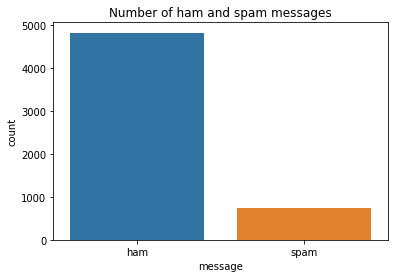

In [50]:
sns.countplot(df.label)
plt.xlabel('message')
plt.title('Number of ham and spam messages')

In [59]:
df.groupby('label').describe()# some message repeats, but not many

message                                                               
        count unique                                                top freq
label                                                                       
ham      4827   4518                             Sorry, I'll call later   30
spam      747    642  Please call our customer service representativ...    4

### Cleaning Data and Making a Document Term Matrix

add column of sentiment with textblob package

In [179]:
#df['message'] = df['message'].translate(str.maketrans('', '', string.punctuation))
df['message'] = df['message'].astype('str')
df['message'] = df['message'].str.lower().str.split()
stop = stopwords.words('english')
punctuation = set(string.punctuation)
df['message'] = df['message'].apply(lambda x: [item for item in x if item not in stop])
df['message'] = df['message'].apply(lambda x: [item for item in x if item not in punctuation])
df['message'] = df['message'].astype('str')
df.head()

,label,message
0,ham,"['go', 'jurong', 'point,', 'crazy..', 'availab..."
1,ham,"['ok', 'lar...', 'joking', 'wif', 'u', 'oni...']"
2,spam,"['free', 'entry', '2', 'wkly', 'comp', 'win', ..."
3,ham,"['u', 'dun', 'say', 'early', 'hor...', 'u', 'c..."
4,ham,"['nah', 'think', 'goes', 'usf,', 'lives', 'aro..."


#### Getting counts of most used words

In [180]:
count1 = Counter(" ".join(df[df['label']=='ham']["message"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(df[df['label']=='spam']["message"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})


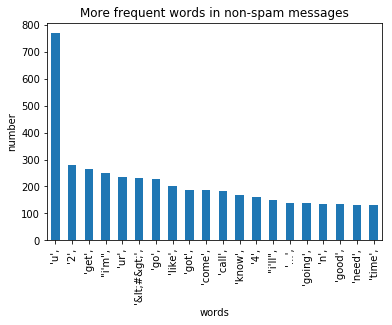

In [181]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

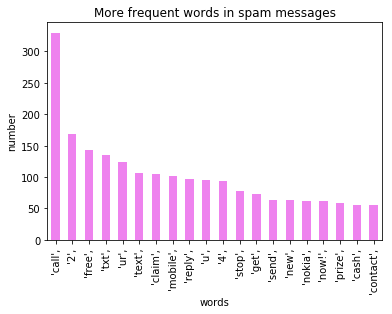

In [182]:
df2.plot.bar(legend = False, color = 'violet')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [183]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(df["message"])
np.shape(X)

(5574, 8503)

In [184]:
type(X)

scipy.sparse.csr.csr_matrix

In [185]:
df1.head()

,words in non-spam,count
0,"'u',",769
1,"'2',",280
2,"'get',",265
3,"""i'm"",",251
4,"'ur',",234


#### With NLTK Package

In [21]:
#https://www.kaggle.com/muzzzdy/spam-detection-classifiers-hyperparameter-tuning

import string

In [22]:
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [205]:
text_feat = df['message'].copy()
text_feat = text_feat.apply(text_process)
vectorizer = TfidfVectorizer(stop_words = "english")
features = vectorizer.fit_transform(text_feat)

The function is used to separate the words while filtering out stop words and only keeping the stems of the words. Then, it reates a sparce matrix with all the vocabulary being used against whether it appears in the message using TfidfVectorizer. Next, it is fit, or normalized into a 0-1 scale to score it based on how unique the word is.  

vectorizer.get_feature_names()

In [132]:
features.shape

(5574, 8009)

In [137]:
print(features[1])

  (0, 5161)	0.282511100494926
  (0, 4238)	0.4208217677471645
  (0, 4026)	0.4773467356043776
  (0, 7672)	0.44483720868019766
  (0, 5190)	0.5633440065082365


In [114]:
features_train, features_test, labels_train, labels_test = train_test_split(features, df['label'], test_size=0.25, random_state=80)

## Naiive Bayes

This assumes that each feature(word) is independent. Models such as neural networks and SVM's can use associations between the words, but I suspect that these will be important. 

In [116]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [117]:
nb.fit(features_train,labels_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [118]:
pred = nb.predict(features_test)

In [200]:
pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [186]:
from sklearn.metrics import confusion_matrix
confusion_matrix(labels_test, pred)

array([[1206,    0],
       [  59,  129]], dtype=int64)

Because of the class imbalance, 59 false negatives are made, but no false positives, so there should be a cost function used to better identify spam messages. The accuracy is 95.8%

In [144]:
classification_report(labels_test, pred)

'             precision    recall  f1-score   support\n\n        ham       0.95      1.00      0.98      1206\n       spam       1.00      0.69      0.81       188\n\navg / total       0.96      0.96      0.95      1394\n'

          precision    recall  f1-score   support
  ham       0.95      1.00      0.98      1206
 spam       1.00      0.69      0.81       188
total       0.96      0.96      0.95      1394

In [ ]:
#use decision_function() instead of predict to change recall using a high threshold

## Other models

In [147]:
labels_train.head()

2387    ham
1014    ham
3958    ham
1385    ham
2452    ham
Name: label, dtype: object

In [188]:
#For a ROC curve, binary labels are required.
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
lab1 = encoder.fit_transform(labels_train)
lab2 = encoder.fit_transform(labels_test)
lab1

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
Cross validating using Logistic Regression was close to the accuracy of Naiive Bayes. 

In [203]:
kfold = model_selection.KFold(n_splits=10, random_state=425)
model = LogisticRegression()
#scoring = 'roc_auc'
scoring = 'accuracy'
validation = model_selection.cross_val_score(model, features_train, lab1, cv=kfold, scoring=scoring)
validation.mean()

C:\Users\Megan Stafford\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Megan Stafford\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Megan Stafford\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Megan Stafford\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

0.9447368421052632

The average of the 10 folds of cross validation is 94.5%, which isn't any better. Evaluating multiple subsets of the data doesn't improve the model. 

In [196]:
results.mean()#This is the AUC value for the above model.

0.9863873843551497